In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Online_Retail.csv", encoding='latin1')

In [2]:
data = data.dropna(subset=['InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice'])
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.month

data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

month_12 = data[data['Month'] == 12]['TotalAmount']
month_11 = data[data['Month'] == 11]['TotalAmount']

t_stat, p_value = ttest_ind(month_11, month_12, equal_var=False)

print("T-test Statistic:", round(t_stat, 4))
print("P-value:", round(p_value, 4))

sales_by_month = data.groupby('Month')['TotalAmount'].sum().reset_index()

C:\Users\PRAVEEN ANANTH\AppData\Local\Temp\ipykernel_17196\1269940330.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


T-test Statistic: -1.8202
P-value: 0.0687


C:\Users\PRAVEEN ANANTH\AppData\Local\Temp\ipykernel_17196\1178256550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='TotalAmount', data=sales_by_month, palette='coolwarm')


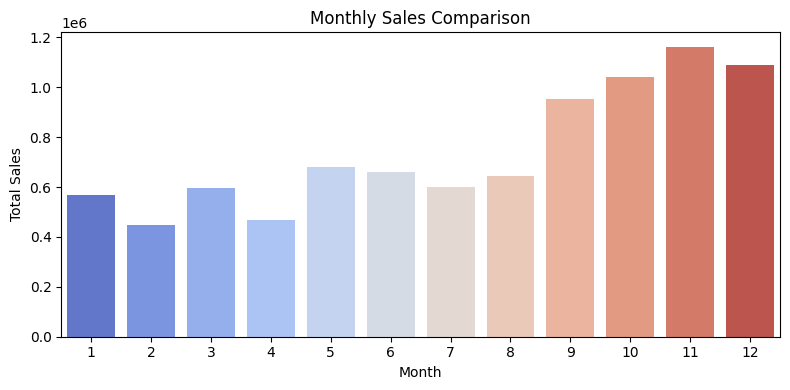

In [3]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Month', y='TotalAmount', data=sales_by_month, palette='coolwarm')
plt.title('Monthly Sales Comparison')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()